In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
from googletrans import Translator
import sklearn
import sys
sys.path.append('..')
import cleaner
import utils
%config IPCompleter.use_jedi = False

In [55]:
pd.set_option('display.max_columns', None)

In [56]:
raw_df = pd.read_csv('../data/Post-2023-11-13.csv')

/tmp/ipykernel_64751/4215119273.py:1: DtypeWarning: Columns (10,11,12,13,16,17,55,56,58,68,69) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv('../data/Post-2023-11-13.csv')


In [57]:
raw_df

,id,is_active,created_at,token,token_code,city_rel,city_name,image_count,title,top_description_text,middle_description_text,bottom_description_text,red_text,checkable,label,label_color,is_checked,has_chat,district_persian,city_persian,category_slug_persian,last_post_date,first_post_date,brand_model,business_ref,business_type,cat_1,cat_2,cat_3,category,city,credit,district,gender,originality,price,rent,status,image_url,web_url,unavailable_after,description,chat_enabled,suggestion_tokens,elevator,not_elevator,parking,not_parking,depot,not_depot,map_type,latitude,longitude,radius,map_image_url,balcony,not_balcony,check_cost_limit,check_cost,pricing_cost,meter,rooms,floor,total_price,price_per_meter,real_state_agency,real_state_agent,year,land_meter,house_status
0,37948,1,2023-11-13 04:27:44,37979,QZNFO9oB,NaN,tehran,5,آپارتمان ۹۵ متر ۲خواب الماس منطقه_سرمایه گذاری...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,کوی فردوس,تهران,فروش آپارتمان,NaN,NaN,NaN,44360,real-estate-business,real-estate,residential-sell,apartment-sell,apartment-sell,tehran,0,kooy-e-ferdos,NaN,NaN,8999999488,0,NaN,https://s100.divarcdn.com/static/thumbnails/16...,https://divar.ir/v/QZNFO9oB,2023-12-11T11:25:51.579191,آپارتمان ۹۵ متر ۲خواب الماس منطقه_سرمایه گذاری...,True,"[""QZItZvpV"", ""QZ-ImPE4"", ""QZ1UgRuS"", ""QZNpeQ2A...",True,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,۹۵,۲,۲,۹٬۰۰۰٬۰۰۰٬۰۰۰ تومان,۹۴٬۷۳۶٬۰۰۰ تومان,نوین قشقایی,رضا کرمی,۱۳۹۷,NaN,NaN
1,37947,1,2023-11-13 04:27:44,37978,QZGBGQs7,NaN,tehran,7,48متر فول نوسازی شده، سند تکبرگ|فروش آپارتمان|...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,اندیشه (شهر زیبا),تهران,فروش آپارتمان,NaN,NaN,NaN,44776,real-estate-business,real-estate,residential-sell,apartment-sell,apartment-sell,tehran,0,andisheh,NaN,NaN,1000000000,0,NaN,https://s100.divarcdn.com/static/thumbnails/16...,https://divar.ir/v/QZGBGQs7,2023-12-05T19:45:47.579305,48متر فول نوسازی شده، سند تکبرگ|فروش آپارتمان|...,True,"[""QZ5MDcb3"", ""QZ0Mv7EQ"", ""QZ6woMET"", ""QZClg-r1...",True,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,۴۸,۱,۱ از ۳,۱٬۰۰۰٬۰۰۰٬۰۰۰ تومان,۲۰٬۸۳۳٬۰۰۰ تومان,املاک بزرگ منصور,و کارشناس فروش خانم کیا,۱۳۹۴,NaN,NaN
2,37946,1,2023-11-13 04:27:44,37977,QZJhfIdg,NaN,tehran,0,آپارتمان 57متر.پارکینک دار|فروش آپارتمان|تهران...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,مشیریه,تهران,فروش آپارتمان,NaN,NaN,NaN,43989,real-estate-business,real-estate,residential-sell,apartment-sell,apartment-sell,tehran,0,moshiriyeh,NaN,NaN,2249999872,0,NaN,NaN,https://divar.ir/v/QZJhfIdg,2023-12-08T12:11:11.283095,آپارتمان 57متر.پارکینک دار|فروش آپارتمان|تهران...,True,"[""QZHZ2ivu"", ""QZ_8mE4t"", ""QZLJa-4n"", ""QZCJSG8K...",NaN,True,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,۵۷,۱,۲,۲٬۲۵۰٬۰۰۰٬۰۰۰ تومان,۳۹٬۴۷۳٬۰۰۰ تومان,مجموعه املاک آهنگ,محمد ساعی,۱۳۸۲,NaN,NaN
3,37945,1,2023-11-13 04:27:43,37976,QZ_8WPk7,NaN,tehran,5,۹۲ متر _فول امکانات _ طبقه ششم|فروش آپارتمان|ت...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,استاد معین,تهران,فروش آپارتمان,NaN,NaN,NaN,44641,real-estate-business,real-estate,residential-sell,apartment-sell,apartment-sell,tehran,0,ostad-moein,NaN,NaN,5500000256,0,NaN,https://s100.divarcdn.com/static/thumbnails/16...,https://divar.ir/v/QZ_8WPk7,2023-11-30T12:24:32.440950,۹۲ متر _فول امکانات _ طبقه ششم|فروش آپارتمان|ت...,True,"[""QZANwJri"", ""QZIVao-Q"", ""QZJlvUss"", ""QZGpEmXB...",True,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,https://api.divar.ir/v8/mapimage?encrypted_dat...,NaN,NaN,NaN,NaN,NaN,۹۲,۲,۶ از ۶,۵٬۵۰۰٬۰۰۰٬۰۰۰ تومان,۵۹٬۷۸۲٬۰۰۰ تومان,گروه مشاورین املاک سران شعبه ٢,amir,۱۴۰۲,NaN,NaN
4,37944,1,2023-11-13 04:27:43,37975,QZMtO-33,NaN,tehran,7,۱۵۰ متر *مشاعات آبی فعال ونک*|فروش آپارتمان|ته...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ونک,تهران,فروش آپارتمان,NaN,NaN,NaN,3683,real-estate-business,real-estate,residential-sell,apartment-sell,apartment-sell,tehran,0,vanak,NaN,NaN,22499999744,0,NaN,https://s100.divarcdn.com/static/thumbnails/16...,https://divar.ir/v/QZMtO-33,2023-12-10T17:56:19.584976,۱۵۰ متر *مشاعات آبی فعال ونک*|فروش آ

In [58]:
# raw_df.real_state_agency[(raw_df.real_state_agency.str.contains('personal'))]
raw_df[raw_df['real_state_agency'].isna() | raw_df['real_state_agency'].str.contains('personal')]

,id,is_active,created_at,token,token_code,city_rel,city_name,image_count,title,top_description_text,middle_description_text,bottom_description_text,red_text,checkable,label,label_color,is_checked,has_chat,district_persian,city_persian,category_slug_persian,last_post_date,first_post_date,brand_model,business_ref,business_type,cat_1,cat_2,cat_3,category,city,credit,district,gender,originality,price,rent,status,image_url,web_url,unavailable_after,description,chat_enabled,suggestion_tokens,elevator,not_elevator,parking,not_parking,depot,not_depot,map_type,latitude,longitude,radius,map_image_url,balcony,not_balcony,check_cost_limit,check_cost,pricing_cost,meter,rooms,floor,total_price,price_per_meter,real_state_agency,real_state_agent,year,land_meter,house_status
5,37943,1,2023-11-13 04:27:43,37974,QZ4oz2p4,NaN,tehran,11,آ‌پارتمان۲۳۵ متر فلکه اول تهران‌پارس|فروش آپار...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,تهرانپارس غربی,تهران,فروش آپارتمان,NaN,NaN,NaN,NaN,personal,real-estate,residential-sell,apartment-sell,apartment-sell,tehran,0,west-tehranpars,NaN,NaN,30000001024,0,NaN,https://s100.divarcdn.com/static/thumbnails/16...,https://divar.ir/v/QZ4oz2p4,2023-11-25T01:15:12.543105,آ‌پارتمان۲۳۵ متر فلکه اول تهران‌پارس|فروش آپار...,True,"[""QZ5gULGr"", ""QZM5LnPq"", ""QZ50DeFe"", ""QZJ9e03F...",True,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,https://api.divar.ir/v8/mapimage?encrypted_dat...,NaN,NaN,NaN,NaN,NaN,۲۳۵,۳,۳,۳۰٬۰۰۰٬۰۰۰٬۰۰۰ تومان,۱۲۷٬۶۵۹٬۰۰۰ تومان,NaN,NaN,۱۳۹۰,NaN,NaN
8,37940,1,2023-11-13 04:27:37,37971,QZG5iXom,NaN,tehran,6,۸۸ متر دو خواب شهر زیبا|فروش آپارتمان|تهران، ش...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,شهر زیبا,تهران,فروش آپارتمان,NaN,NaN,NaN,agent_295051,real-estate-business,real-estate,residential-sell,apartment-sell,apartment-sell,tehran,0,shahr-e-ziba,NaN,NaN,7600000000,0,NaN,https://s100.divarcdn.com/static/thumbnails/16...,https://divar.ir/v/QZG5iXom,2023-12-05T15:13:36.250435,۸۸ متر دو خواب شهر زیبا|فروش آپارتمان|تهران، ش...,True,"[""QZLVY4i0"", ""QZ9UGxCo"", ""QZM9pQzN"", ""QZCtAQ3k...",True,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,۸۸,۲,۳,۷٬۶۰۰٬۰۰۰٬۰۰۰ تومان,۸۶٬۳۶۳٬۰۰۰ تومان,NaN,حسین ابدی,۱۳۹۰,NaN,NaN
12,37936,1,2023-11-13 04:27:36,37967,AZ7iclOm,NaN,tehran,5,75متر اپارتمان.سعیداباد. مجتمع مهستان|فروش آپا...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,سعیدآباد,تهران,فروش آپارتمان,NaN,NaN,NaN,agent_450788,real-estate-business,real-estate,residential-sell,apartment-sell,apartment-sell,tehran,0,saeed-abad,NaN,NaN,1300000000,0,NaN,https://s100.divarcdn.com/static/thumbnails/16...,https://divar.ir/v/AZ7iclOm,2023-11-20T15:48:43.314490,75متر اپارتمان.سعیداباد. مجتمع مهستان|فروش آپا...,True,"[""QZ38JnRT"", ""QZI5HwAM"", ""QZ0QMqp7"", ""QZH9_vJU...",True,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,۷۵,۲,۶ از ۶,۱٬۳۰۰٬۰۰۰٬۰۰۰ تومان,۱۷٬۳۳۳٬۰۰۰ تومان,NaN,خانم امامی املاک مهر,۱۴۰۲,NaN,NaN
13,37935,1,2023-11-13 04:27:36,37966,QZH10rGP,NaN,tehran,0,۱۰۰متر دو خوابه فرمانیه عسگریان|فروش آپارتمان|...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,فرمانیه,تهران,فروش آپارتمان,NaN,NaN,NaN,agent_12266,real-estate-business,real-estate,residential-sell,apartment-sell,apartment-sell,tehran,0,farmaniyeh,NaN,NaN,111111110656,0,NaN,NaN,https://divar.ir/v/QZH10rGP,2023-12-06T11:39:29.743369,۱۰۰متر دو خوابه فرمانیه عسگریان|فروش آپارتمان|...,True,"[""QZ8I8vvx"", ""QZGJRZ6M"", ""QZHdKcgL"", ""QZ_8oTFm...",True,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,۱۰۰,۲,۶ از ۱۰,۱۱۱٬۱۱۱٬۱۱۱٬۱۱۱ تومان,۱٬۱۱۱٬۱۱۱٬۰۰۰ تومان,NaN,علی فکری,۱۴۰۲,NaN,NaN
14,37934,1,2023-11-13 04:27:36,37965,QZHgPRNE,NaN,tehran,20,تحویل واحد در برج وام دار چیتگرشرایطی‌منطقه۲۲|...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,چیتگر,تهران,فروش آپارتمان,NaN,NaN,NaN,agent_452370,real-estate-business,real-estate,residential-sell,apartment-sell,apartment-sell,tehran,0,chitgar,NaN,NaN,1690000000,0,NaN,https://s100.divarcdn.com/static/thumbnails/16...,https://divar.ir/v/QZHgPRNE,2023-11-18T10:44:08.978704,تحویل واحد در برج وام دار چیتگرشرایطی‌منطقه۲۲|...,True,"[""QZ_0esMC

In [59]:
(raw_df.isna().sum() / raw_df.id.count() > 0.9 )
null_percentage = raw_df.isna().sum() / raw_df.shape[0]
columns_with_more_than_80_percent_null = null_percentage[null_percentage > 0.8].index
columns_with_more_than_90_percent_null = null_percentage[null_percentage > 0.9].index
percent_90_null_columns = [column for column in columns_with_more_than_90_percent_null]
percent_80_null_columns = [column for column in columns_with_more_than_80_percent_null]

len(percent_90_null_columns)

# {"null_90":percent_90_null_columns,'null_80':set(percent_80_null_columns) - set(percent_90_null_columns)}
percent_80_null_columns

['city_rel',
 'top_description_text',
 'middle_description_text',
 'bottom_description_text',
 'red_text',
 'checkable',
 'label',
 'label_color',
 'is_checked',
 'has_chat',
 'last_post_date',
 'first_post_date',
 'brand_model',
 'gender',
 'originality',
 'status',
 'not_elevator',
 'not_parking',
 'not_depot',
 'map_type',
 'latitude',
 'longitude',
 'radius',
 'balcony',
 'not_balcony',
 'check_cost_limit',
 'check_cost',
 'pricing_cost',
 'land_meter',
 'house_status']

In [60]:
df = cleaner.Cleaner(raw_df).transform()

In [61]:
if_near = pd.read_csv('../data/if_near.csv')

In [62]:
if_near['loc_name'].nunique()

339

In [63]:
df['district_persian'] = df.district_persian.str.replace('‌','')
df['district_persian'] = df.district_persian.str.replace(' ','')

In [64]:
result = df.loc[~df['district_persian'].isin(if_near['loc_name'])]
# result

In [65]:
result.district_persian.nunique()

322

In [66]:
for_visualization = pd.merge(df, if_near[['loc_name','lat','long']], left_on='district_persian', right_on='loc_name', how='right')

In [67]:
df = pd.merge(df, if_near[['loc_name','if_near']], left_on='district_persian', right_on='loc_name', how='right')

In [68]:
df.if_near.value_counts()

if_near
0    315
1     52
Name: count, dtype: int64

### EDA

In [69]:
df.describe()

,id,is_active,token,image_count,credit,price,rent,if_near
count,29.000000,29.0,29.000000,29.000000,29.0,2.900000e+01,29.0,367.000000
mean,18866.517241,1.0,18880.275862,6.655172,0.0,2.514828e+09,0.0,0.141689
std,12072.503118,0.0,12081.246840,3.165392,0.0,7.233591e+08,0.0,0.349207
min,555.000000,1.0,555.000000,0.000000,0.0,1.650000e+09,0.0,0.000000
25%,8589.000000,1.0,8597.000000,5.000000,0.0,1.980000e+09,0.0,0.000000
50%,17318.000000,1.0,17331.000000,6.000000,0.0,2.300000e+09,0.0,0.000000
75%,31216.000000,1.0,31239.000000,8.000000,0.0,2.750000e+09,0.0,0.000000
max,37089.000000,1.0,37117.000000,13.000000,0.0,4.500000e+09,0.0,1.000000


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     29 non-null     float64
 1   is_active              29 non-null     float64
 2   created_at             29 non-null     object 
 3   token                  29 non-null     float64
 4   token_code             29 non-null     object 
 5   city_name              29 non-null     object 
 6   image_count            29 non-null     float64
 7   title                  29 non-null     object 
 8   district_persian       29 non-null     object 
 9   city_persian           29 non-null     object 
 10  category_slug_persian  29 non-null     object 
 11  business_ref           15 non-null     object 
 12  business_type          29 non-null     object 
 13  cat_1                  29 non-null     object 
 14  cat_2                  29 non-null     object 
 15  cat_3 

In [71]:
df.isna().sum().sort_values(ascending=False)

balcony                  367
business_ref             352
real_state_agent         352
depot                    349
parking                  348
elevator                 347
unavailable_after        344
image_url                340
floor                    339
suggestion_tokens        339
rooms                    339
year                     339
city_persian             338
district_persian         338
city_name                338
token_code               338
token                    338
created_at               338
is_active                338
id                       338
title                    338
image_count              338
cat_2                    338
cat_3                    338
business_type            338
category_slug_persian    338
description              338
web_url                  338
price                    338
rent                     338
district                 338
credit                   338
category                 338
city                     338
cat_1         

In [72]:
df.total_price.unique()

array([nan, '2٬436٬000٬000 تومان', '2٬080٬000٬000 تومان',
       '1٬820٬000٬000 تومان', '1٬650٬000٬000 تومان',
       '2٬200٬000٬000 تومان', '3٬375٬000٬000 تومان',
       '1٬950٬000٬000 تومان', '2٬100٬000٬000 تومان',
       '4٬500٬000٬000 تومان', '3٬450٬000٬000 تومان',
       '3٬650٬000٬000 تومان', '4٬000٬000٬000 تومان',
       '2٬300٬000٬000 تومان', '3٬300٬000٬000 تومان',
       '1٬980٬000٬000 تومان', '2٬494٬000٬000 تومان',
       '1٬890٬000٬000 تومان', '2٬475٬000٬000 تومان',
       '3٬075٬000٬000 تومان', '2٬550٬000٬000 تومان',
       '2٬420٬000٬000 تومان', '2٬400٬000٬000 تومان',
       '1٬845٬000٬000 تومان', '2٬750٬000٬000 تومان'], dtype=object)

In [73]:
df['floor']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
362    NaN
363    NaN
364    NaN
365    NaN
366    NaN
Name: floor, Length: 367, dtype: object

In [74]:
df.meter.unique()

array([nan, '58', '52', '60', '40', '75', '55', '49', '93', '87', '90',
       '44', '54', '50', '61', '38', '45', '48', '55 متر'], dtype=object)

In [75]:
df.year.unique()

array([nan, '1397', '1400', '1385', '1396', '1402', '1398', '1395',
       '1394', '1384', '1393', '1390', '1388', None], dtype=object)

In [76]:
df.rooms.unique()

array([nan, '1', '2', None], dtype=object)

In [77]:
df[['total_price','price_per_meter','price']] = df[['total_price','price_per_meter','price']].applymap(lambda x: str(x).replace('تومان',''))
df['total_price'] = df['total_price'].str.replace('\D', '', regex=True)
df['price'] = df['price'].str.replace('\D', '', regex=True)
df['price_per_meter'] = df['price_per_meter'].str.replace('\D', '', regex=True)
df['meter'] = df['meter'].str.replace('متر','').str.replace('\D', '', regex=True)
df['rooms'] = df['rooms'].str.replace('4+','5').str.replace('بدون اتاق','0')

In [78]:
df['total_price'] = pd.to_numeric(df['total_price'])
df['price'] = pd.to_numeric(df['price'])
df['price_per_meter'] = pd.to_numeric(df['price_per_meter'])
df['rooms'] = pd.to_numeric(df['rooms'])
df['meter'] = pd.to_numeric(df['meter'])

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     29 non-null     float64
 1   is_active              29 non-null     float64
 2   created_at             29 non-null     object 
 3   token                  29 non-null     float64
 4   token_code             29 non-null     object 
 5   city_name              29 non-null     object 
 6   image_count            29 non-null     float64
 7   title                  29 non-null     object 
 8   district_persian       29 non-null     object 
 9   city_persian           29 non-null     object 
 10  category_slug_persian  29 non-null     object 
 11  business_ref           15 non-null     object 
 12  business_type          29 non-null     object 
 13  cat_1                  29 non-null     object 
 14  cat_2                  29 non-null     object 
 15  cat_3 

In [80]:
df['year'] = df['year'].str.replace('قبل از 1370','1000')

In [81]:
df['year'] = pd.to_numeric(df['year'])

In [82]:
df['floor'].tail(20)

347    NaN
348    NaN
349    NaN
350    NaN
351    NaN
352    NaN
353    NaN
354    NaN
355    NaN
356    NaN
357    NaN
358    NaN
359    NaN
360    NaN
361    NaN
362    NaN
363    NaN
364    NaN
365    NaN
366    NaN
Name: floor, dtype: object

In [83]:
df.cat_1.unique()

array([nan, 'real-estate'], dtype=object)

In [84]:
df.cat_2.unique()

array([nan, 'residential-sell'], dtype=object)

In [85]:
df.cat_3.unique()

array([nan, 'apartment-sell', 'plot-old'], dtype=object)

In [86]:
df.loc[:,['cat_1','cat_2','cat_3']].tail(30)

,cat_1,cat_2,cat_3
337,NaN,NaN,NaN
338,NaN,NaN,NaN
339,NaN,NaN,NaN
340,NaN,NaN,NaN
341,NaN,NaN,NaN
342,NaN,NaN,NaN
343,NaN,NaN,NaN
344,NaN,NaN,NaN
345,NaN,NaN,NaN
346,NaN,NaN,NaN


<Axes: >

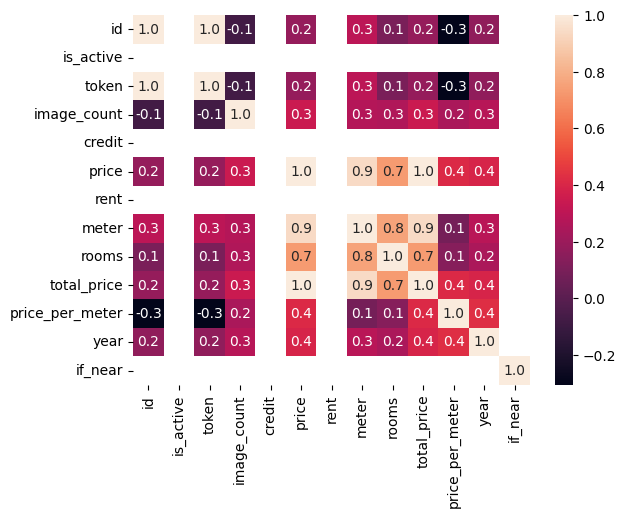

In [87]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, fmt=".1f")

In [88]:
df.columns

Index(['id', 'is_active', 'created_at', 'token', 'token_code', 'city_name',
       'image_count', 'title', 'district_persian', 'city_persian',
       'category_slug_persian', 'business_ref', 'business_type', 'cat_1',
       'cat_2', 'cat_3', 'category', 'city', 'credit', 'district', 'price',
       'rent', 'image_url', 'web_url', 'unavailable_after', 'description',
       'chat_enabled', 'suggestion_tokens', 'elevator', 'parking', 'depot',
       'balcony', 'meter', 'rooms', 'floor', 'total_price', 'price_per_meter',
       'real_state_agency', 'real_state_agent', 'year', 'loc_name', 'if_near'],
      dtype='object')

## visualization

In [89]:
for_visualization

,id,is_active,created_at,token,token_code,city_name,image_count,title,district_persian,city_persian,category_slug_persian,business_ref,business_type,cat_1,cat_2,cat_3,category,city,credit,district,price,rent,image_url,web_url,unavailable_after,description,chat_enabled,suggestion_tokens,elevator,parking,depot,balcony,meter,rooms,floor,total_price,price_per_meter,real_state_agency,real_state_agent,year,loc_name,lat,long
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,چیتگر تهران,35.716956,51.243865
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,شهرک غرب تهران,35.759061,51.376042
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,دروس تهران,35.772735,51.456687
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,شریف تهران,35.692278,51.371170
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,شکوفه تهران,35.684468,51.449000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,فرودگاه مهرآباد تهران,35.690066,51.302229
363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,شهرک والفجر تهران,35.646718,50.999515
364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,پامنار تهران,35.681252,51.424649
365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,قصر فیروزه ۲ تهران,35.651683,51.503203


In [90]:
for_visualization[["total_price","price_per_meter"]]= for_visualization[["total_price","price_per_meter"]].applymap(lambda x: str(x).replace('تومان',''))
for_visualization["price_per_meter"] = for_visualization["price_per_meter"].str.replace('\D', '', regex=True)
for_visualization["price_per_meter"] = pd.to_numeric(for_visualization["price_per_meter"])

In [91]:
x = for_visualization.drop(["total_price","price_per_meter"], inplace=False, axis=1)
y = for_visualization["price_per_meter"]

In [92]:
from sklearn.model_selection import train_test_split
x_train, _test, y_train, y_test =  train_test_split(x, y, test_size=0.2, random_state=42)

new_x = x_train.copy()

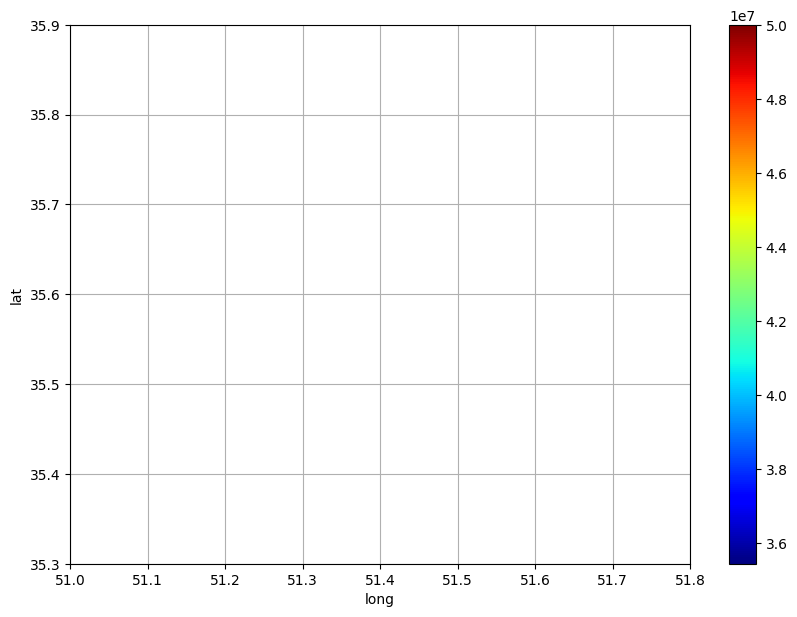

In [93]:
new_x.plot(kind="scatter", x="long", y="lat", grid=True,
             s=y_train/10e7, c=y_train, 
             cmap="jet", colorbar=True, 
             legend=True, sharex=False, figsize=(10, 7))
plt.xlim(51,51.8)
plt.ylim(35.3,35.9)
# plt.xlim(50,53)
# plt.ylim(33,38)
plt.show()